In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import warnings
from warnings import filterwarnings 
warnings.filterwarnings("ignore", category=DeprecationWarning) 
filterwarnings('ignore')
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
import pickle


In [2]:
data = pd.read_csv('hospital_deaths_train_08_rt42.csv')

In [3]:
data.head()

,recordid,In-hospital_death,Age,Gender,Height,Weight,CCU,CSRU,SICU,DiasABP_first,...,SysABP_last,TroponinI_last,TroponinT_last,WBC_last,Weight_last,pH_last,MechVentStartTime,MechVentDuration,MechVentLast8Hour,UrineOutputSum
0,136430,0,54.0,1.0,177.8,73.9,0,1,0,59.0,...,127.0,NaN,NaN,9.6,80.2,7.37,141.0,91.0,0.0,4.0
1,142453,0,62.0,1.0,NaN,100.9,0,0,0,48.0,...,139.0,NaN,NaN,9.1,100.9,7.42,136.0,2690.0,1.0,14.0
2,137911,0,47.0,1.0,152.4,83.9,0,0,1,50.0,...,96.0,NaN,NaN,5.0,NaN,7.45,18.0,2820.0,1.0,17.0
3,138179,0,68.0,1.0,177.8,198.0,0,0,0,NaN,...,NaN,NaN,NaN,14.4,198.0,7.32,109.0,2730.0,1.0,16.0
4,135358,0,78.0,1.0,NaN,99.5,0,0,1,NaN,...,NaN,NaN,NaN,8.2,99.5,NaN,NaN,NaN,NaN,NaN


In [4]:
feature = ['In-hospital_death','Age', 'Gender', 'Height', 'CCU', 'CSRU', 'SICU', 'MAP_first',
       'GCS_last', 'MAP_last', 'NIDiasABP_last', 'NIMAP_last',
       'DiasABP_lowest', 'MAP_lowest', 'NISysABP_lowest', 'Temp_lowest',
       'Glucose_highest', 'HR_highest', 'MAP_highest', 'MAP_median',
       'FiO2_first', 'HCO3_first', 'HCT_first', 'K_first', 'Lactate_first',
       'Mg_first', 'Na_first', 'PaCO2_first', 'PaO2_first', 'SysABP_first',
       'WBC_first', 'pH_first', 'BUN_last', 'Creatinine_last', 'FiO2_last',
       'HCO3_last', 'HCT_last', 'K_last', 'Lactate_last', 'Mg_last', 'Na_last',
       'PaCO2_last', 'PaO2_last', 'Platelets_last', 'SysABP_last', 'WBC_last',
       'Weight_last', 'pH_last', 'MechVentStartTime', 'MechVentDuration',
       'MechVentLast8Hour', 'UrineOutputSum']

In [5]:
feature_test = ['Age', 'Gender', 'Height', 'CCU', 'CSRU', 'SICU', 'MAP_first',
       'GCS_last', 'MAP_last', 'NIDiasABP_last', 'NIMAP_last',
       'DiasABP_lowest', 'MAP_lowest', 'NISysABP_lowest', 'Temp_lowest',
       'Glucose_highest', 'HR_highest', 'MAP_highest', 'MAP_median',
       'FiO2_first', 'HCO3_first', 'HCT_first', 'K_first', 'Lactate_first',
       'Mg_first', 'Na_first', 'PaCO2_first', 'PaO2_first', 'SysABP_first',
       'WBC_first', 'pH_first', 'BUN_last', 'Creatinine_last', 'FiO2_last',
       'HCO3_last', 'HCT_last', 'K_last', 'Lactate_last', 'Mg_last', 'Na_last',
       'PaCO2_last', 'PaO2_last', 'Platelets_last', 'SysABP_last', 'WBC_last',
       'Weight_last', 'pH_last', 'MechVentStartTime', 'MechVentDuration',
       'MechVentLast8Hour', 'UrineOutputSum']

In [6]:

X = data[feature_test]
y = data['In-hospital_death']

In [7]:
# missing_percentages1 = (data.isnull().sum() / len(data)) * 100
# missing_percentages_sorted1 = missing_percentages1.sort_values(ascending=False)
# having_NAN = missing_percentages_sorted1.index.to_list()

In [8]:
# for feature in having_NAN:
#     data[feature]=data.groupby(['In-hospital_death', 'Gender'])[feature].apply(lambda x:x.fillna(x.mean()))

In [9]:

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = IterativeImputer(max_iter=100, random_state=42)

In [10]:
# from sklearn.base import BaseEstimator, TransformerMixin
# class WithinGroupMeanImputer(BaseEstimator, TransformerMixin):
#     def __init__(self, group_var):
#         if isinstance(group_var, str):
#             group_var = (group_var,)
#         self.group_var = group_var
#     def fit(self, X, y=None):
#         print(X.shape)
#         return self
#     def transform(self, X):
#         # the copy leaves the original dataframe intact
#         X_ = X.copy()
#         print(X.shape)
#         for col in X_.columns:
#             if X_[col].dtypes == 'float64':
#                 X_= X_[X_['Gender'].notna()]
#                 X_[col] = X_.groupby(list(self.group_var))[col].transform(lambda x: x.fillna(x.mean()))
                
#                 X_[col] = X_[col].fillna(X_[col].mean())
#         print(X.shape)
#         return X_
# imp = WithinGroupMeanImputer(group_var=('Gender', 'Age'))


In [11]:
imp.fit(X)

IterativeImputer(max_iter=100, random_state=42)

In [12]:
#data.isnull().sum()

In [13]:


X = pd.DataFrame(imp.transform(X), columns=feature_test)

# data = imp.transform(data)
pickle.dump(imp, open('imp.pkl', 'wb'))

In [14]:
#data.isnull().sum()

In [15]:
data_test = pd.read_csv('hospital_deaths_test_02_rt42.csv')

data_test = data_test[feature_test]
imp_test = pickle.load(open('imp.pkl', 'rb'))
#data_test= pd.DataFrame(imp.transform(data_test), columns=feature)
data_test =imp_test.transform(data_test)
data_test.shape

(650, 51)

In [16]:
X_test = data_test
y_test = pd.read_csv('y_test_02_rt42.csv')

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_test (650, 51)
y_test (650, 1)


In [17]:
tl = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train, y_train = tl.fit_resample(X, y)

In [18]:
minmax_scale = MinMaxScaler()
X_train = minmax_scale.fit_transform(X_train)
pickle.dump(minmax_scale, open('minmax_scale.pkl', 'wb'))

In [19]:
minmax_scale = pickle.load(open('minmax_scale.pkl', 'rb'))
X_test = minmax_scale.transform(X_test)

In [ ]:
grid = dict()
grid['n_estimators'] = [10, 50, 100]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0, 2.0]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

In [20]:
adaboost = AdaBoostClassifier()
adaboost = GridSearchCV(estimator=adaboost, param_grid=grid, cv=cv, scoring='accuracy')
adaboost.fit(X_train, y_train)
pickle.dump(adaboost, open('adaboost.pkl', 'wb'))
adaboost.score(X_train, y_train), adaboost.score(X_test, y_test)

(0.869438202247191, 0.7938461538461539)

In [21]:
print(classification_report(y_test, adaboost.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.82      0.88       574
           1       0.30      0.57      0.39        76

    accuracy                           0.79       650
   macro avg       0.62      0.69      0.63       650
weighted avg       0.86      0.79      0.82       650



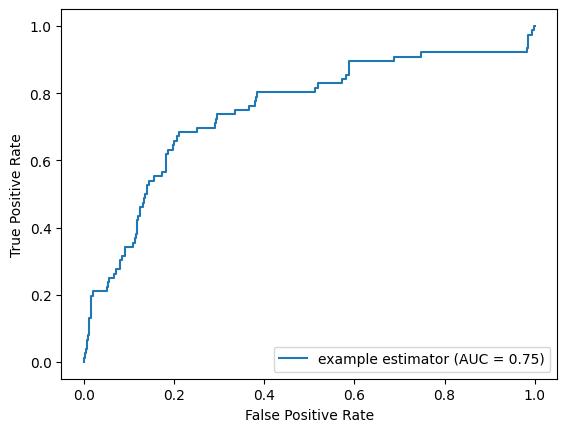

In [22]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, adaboost.predict_proba(X_test)[:, 1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()
plt.show()

In [27]:
adaboost = pickle.load(open('adaboost.pkl', 'rb'))
#pred = adaboost.predict(X_test)


In [47]:
pred = adaboost.predict_proba(X_test)
pred = (pred[:, 1] > 0.501).astype(int)
print(classification_report(y_test, pred))

con = confusion_matrix(y_test, pred)
con = confusion_matrix(y_test, pred)

con

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       574
           1       0.32      0.49      0.39        76

    accuracy                           0.82       650
   macro avg       0.63      0.68      0.64       650
weighted avg       0.86      0.82      0.84       650



array([[497,  77],
       [ 39,  37]], dtype=int64)

Text(70.72222222222221, 0.5, 'Actual')

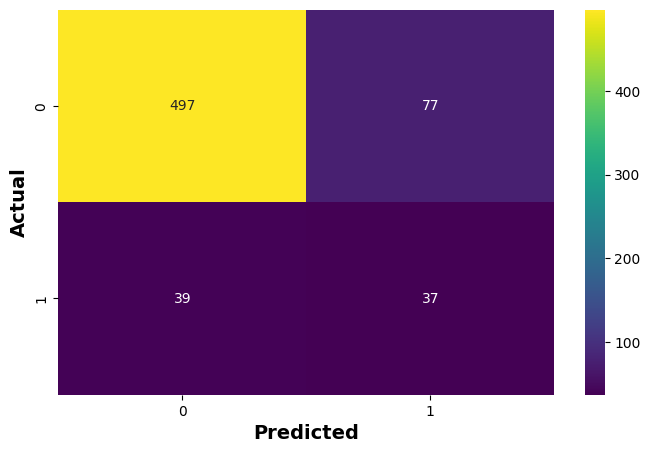

In [48]:
plt.figure(figsize=(8,5))
sns.heatmap(con, annot=True, cmap='viridis', fmt='.0f');
plt.xlabel('Predicted', fontsize=14, weight='bold')
plt.ylabel('Actual', fontsize=14, weight='bold')

In [26]:
import json

ada_prob = adaboost.predict_proba(X_test)[:,1]

# Data to be written
dictionary = {'predict_probas':list(ada_prob), 'threshold':0.5}
# Serializing json
json_object = json.dumps(dictionary, indent=2)
# Writing to sample.json
with open("predictions.json", "w") as outfile:
    outfile.write(json_object)